# Experiment - similarity mellan kod och docs i Cowait

In [1]:
!pip install transformers
!pip install sentence-transformers

In [2]:
from transformers import RobertaTokenizer, T5ForConditionalGeneration

tokenizer = RobertaTokenizer.from_pretrained('Salesforce/codet5-base')
code_t5 = T5ForConditionalGeneration.from_pretrained('Salesforce/codet5-base-multi-sum')

def summarize(code):
    input_ids = tokenizer(code, return_tensors="pt").input_ids
    generated_ids = code_t5.generate(input_ids, max_length=20)
    summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return summary

In [3]:
from sentence_transformers import SentenceTransformer
sbert = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [4]:
from scipy import spatial
import numpy as np

# https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists
def cosine_sim(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [5]:
code = """
    async def run(self, **inputs: dict) -> Any:
        pass
"""

summarize(code)

'Run the nagios process.'

In [6]:
docs_statements = [
  "Cowait organizes code into Tasks. A Task is essentially nothing more than a function, and just like your typical function, it can accept input arguments and return values. Similarly they may also invoke other tasks, with one key difference: a call to another task will be intercepted by the Cowait runtime and executed in a separate container — potentially on a different machine.",
  "The basic unit of execution in Cowait is the Task. Tasks can be implemented either as simple functions, or classes deriving from cowait.Task.",
  "Create a new folder called my-project and a python file called hello.py. We assume you've managed to install Cowait.",
  "You can now run your task. Unlike Python code that you execute directly, this will run inside a Docker Container. You can run your task like so:",
  "You should see something like this:",
  "Behind the scenes, Cowait uses Docker Volume Mounts to speed up local development. Notice that you did not have to build anything. This is because you pulled the base Cowait image in the installation process. If you would like to build your Docker image with your added code, simply run:",
  "Cowait tasks can accept inputs and return outputs.",
  "Inputs that you do not define explicitly in the function signature are passed in **inputs.",
  "You can return whatever you would like, as long as it can be serialized. This work out of the box with python types (str, int, float, boolean, list, dict). You can also create your own types",
  "The Cowait CLI allows you to pass inputs when running your task:",
  "hello supplied to cowait run is the python module name. This module should contain exactly one task class. Modules can be single python files or subdirectories with init.py files.",
  "The actual function/class name of the task does not matter when running from the CLI, only when importing and executing tasks from python."
]

In [7]:
docs_vectors = [sbert.encode(x) for x in docs_statements]
code_vector = sbert.encode(summarize(code))


In [8]:
def print_sims(code_vector, docs_vectors, docs_statements):
    for v, d in zip(docs_vectors, docs_statements):
        print((cosine_sim(v, code_vector), d))

In [9]:
print_sims(code_vector, docs_vectors, docs_statements)

(0.2012096643447876, 'Cowait organizes code into Tasks. A Task is essentially nothing more than a function, and just like your typical function, it can accept input arguments and return values. Similarly they may also invoke other tasks, with one key difference: a call to another task will be intercepted by the Cowait runtime and executed in a separate container — potentially on a different machine.')
(0.2450670450925827, 'The basic unit of execution in Cowait is the Task. Tasks can be implemented either as simple functions, or classes deriving from cowait.Task.')
(0.16674649715423584, "Create a new folder called my-project and a python file called hello.py. We assume you've managed to install Cowait.")
(0.28594839572906494, 'You can now run your task. Unlike Python code that you execute directly, this will run inside a Docker Container. You can run your task like so:')
(0.0885678231716156, 'You should see something like this:')
(0.11479149013757706, 'Behind the scenes, Cowait uses Doc

In [10]:
code_vector = sbert.encode("Run the task")
print_sims(code_vector, docs_vectors, docs_statements)

(0.4646320939064026, 'Cowait organizes code into Tasks. A Task is essentially nothing more than a function, and just like your typical function, it can accept input arguments and return values. Similarly they may also invoke other tasks, with one key difference: a call to another task will be intercepted by the Cowait runtime and executed in a separate container — potentially on a different machine.')
(0.5376601219177246, 'The basic unit of execution in Cowait is the Task. Tasks can be implemented either as simple functions, or classes deriving from cowait.Task.')
(0.2512342035770416, "Create a new folder called my-project and a python file called hello.py. We assume you've managed to install Cowait.")
(0.5883685946464539, 'You can now run your task. Unlike Python code that you execute directly, this will run inside a Docker Container. You can run your task like so:')
(0.1413062959909439, 'You should see something like this:')
(0.16583088040351868, 'Behind the scenes, Cowait uses Docke

In [11]:
code_vector = sbert.encode("Run the task immediately")
print_sims(code_vector, docs_vectors, docs_statements)

(0.4393455982208252, 'Cowait organizes code into Tasks. A Task is essentially nothing more than a function, and just like your typical function, it can accept input arguments and return values. Similarly they may also invoke other tasks, with one key difference: a call to another task will be intercepted by the Cowait runtime and executed in a separate container — potentially on a different machine.')
(0.49469244480133057, 'The basic unit of execution in Cowait is the Task. Tasks can be implemented either as simple functions, or classes deriving from cowait.Task.')
(0.23624709248542786, "Create a new folder called my-project and a python file called hello.py. We assume you've managed to install Cowait.")
(0.560480535030365, 'You can now run your task. Unlike Python code that you execute directly, this will run inside a Docker Container. You can run your task like so:')
(0.09766169637441635, 'You should see something like this:')
(0.12374997138977051, 'Behind the scenes, Cowait uses Doc

In [12]:
code_vector = sbert.encode("Run the task with some delay")
print_sims(code_vector, docs_vectors, docs_statements)

(0.4394521415233612, 'Cowait organizes code into Tasks. A Task is essentially nothing more than a function, and just like your typical function, it can accept input arguments and return values. Similarly they may also invoke other tasks, with one key difference: a call to another task will be intercepted by the Cowait runtime and executed in a separate container — potentially on a different machine.')
(0.37692317366600037, 'The basic unit of execution in Cowait is the Task. Tasks can be implemented either as simple functions, or classes deriving from cowait.Task.')
(0.1838313341140747, "Create a new folder called my-project and a python file called hello.py. We assume you've managed to install Cowait.")
(0.41723936796188354, 'You can now run your task. Unlike Python code that you execute directly, this will run inside a Docker Container. You can run your task like so:')
(0.06472743302583694, 'You should see something like this:')
(0.1312756985425949, 'Behind the scenes, Cowait uses Doc

Det kanske kan gå att skilja dem åt, förutsatt att vi kan skicka in vettiga saker till SBERT. (CodeT5/CodeBERT måste kunna känna igen förändringar av koden. Kanske kan gå att träna...) Kolla t.ex på similarity för rad 4 (You can now run...) som börjar högt för "Run the task" och minskar rejält för "... with some delay".

Några frågor som dyker upp:
- Vad kan vara bra threshold för ett par (kod, docs) vektorer hänger ihop?
- Hur mycket ska en kod-vektor behöva ändras för att vi ska leta ändringar bland motsvarande docs-vektorer?
- Hur kan vi få bättre summarizations som upptäcker förändringar bland koden?

## Visualisera det grafiskt

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
def cosine_sims(rows, cols):
    sims = np.zeros((len(rows), len(cols)))
    for i in range(len(rows)):
        for j in range(len(cols)):
            sims[i][j] = cosine_sim(rows[i], cols[j])
    return sims

In [15]:
summarize('''
    def __init__(self, **inputs):
        """
        Creates a new instance of the task. Pass inputs as keyword arguments.
        """

        # We are using **inputs keyword arguments so that in-IDE tooltips will be more helpful
        # (at least less confusing) when invoking subtasks using constructor syntax.
        # However, subtasks will actually never be instantiated. The constructor call is
        # diverted by the runtime in Task.__new__().
        # Tasks should only be constructed by the executor, and it will these 3 arguments:
        if 'taskdef' not in inputs or 'node' not in inputs or \
           'cluster' not in inputs or len(inputs) != 3:
            raise RuntimeError('Invalid task class instantiation')

        self.node = inputs['node']
        self.cluster = inputs['cluster']
        self.taskdef = inputs['taskdef']

        self.parent = ParentTask(self.node)
        self.subtasks = TaskManager(self)
        self.rpc = RpcComponent(self)

        # Set this task as the current active task
        Task.set_current(self)
''')

'Creates a new instance of the task.'

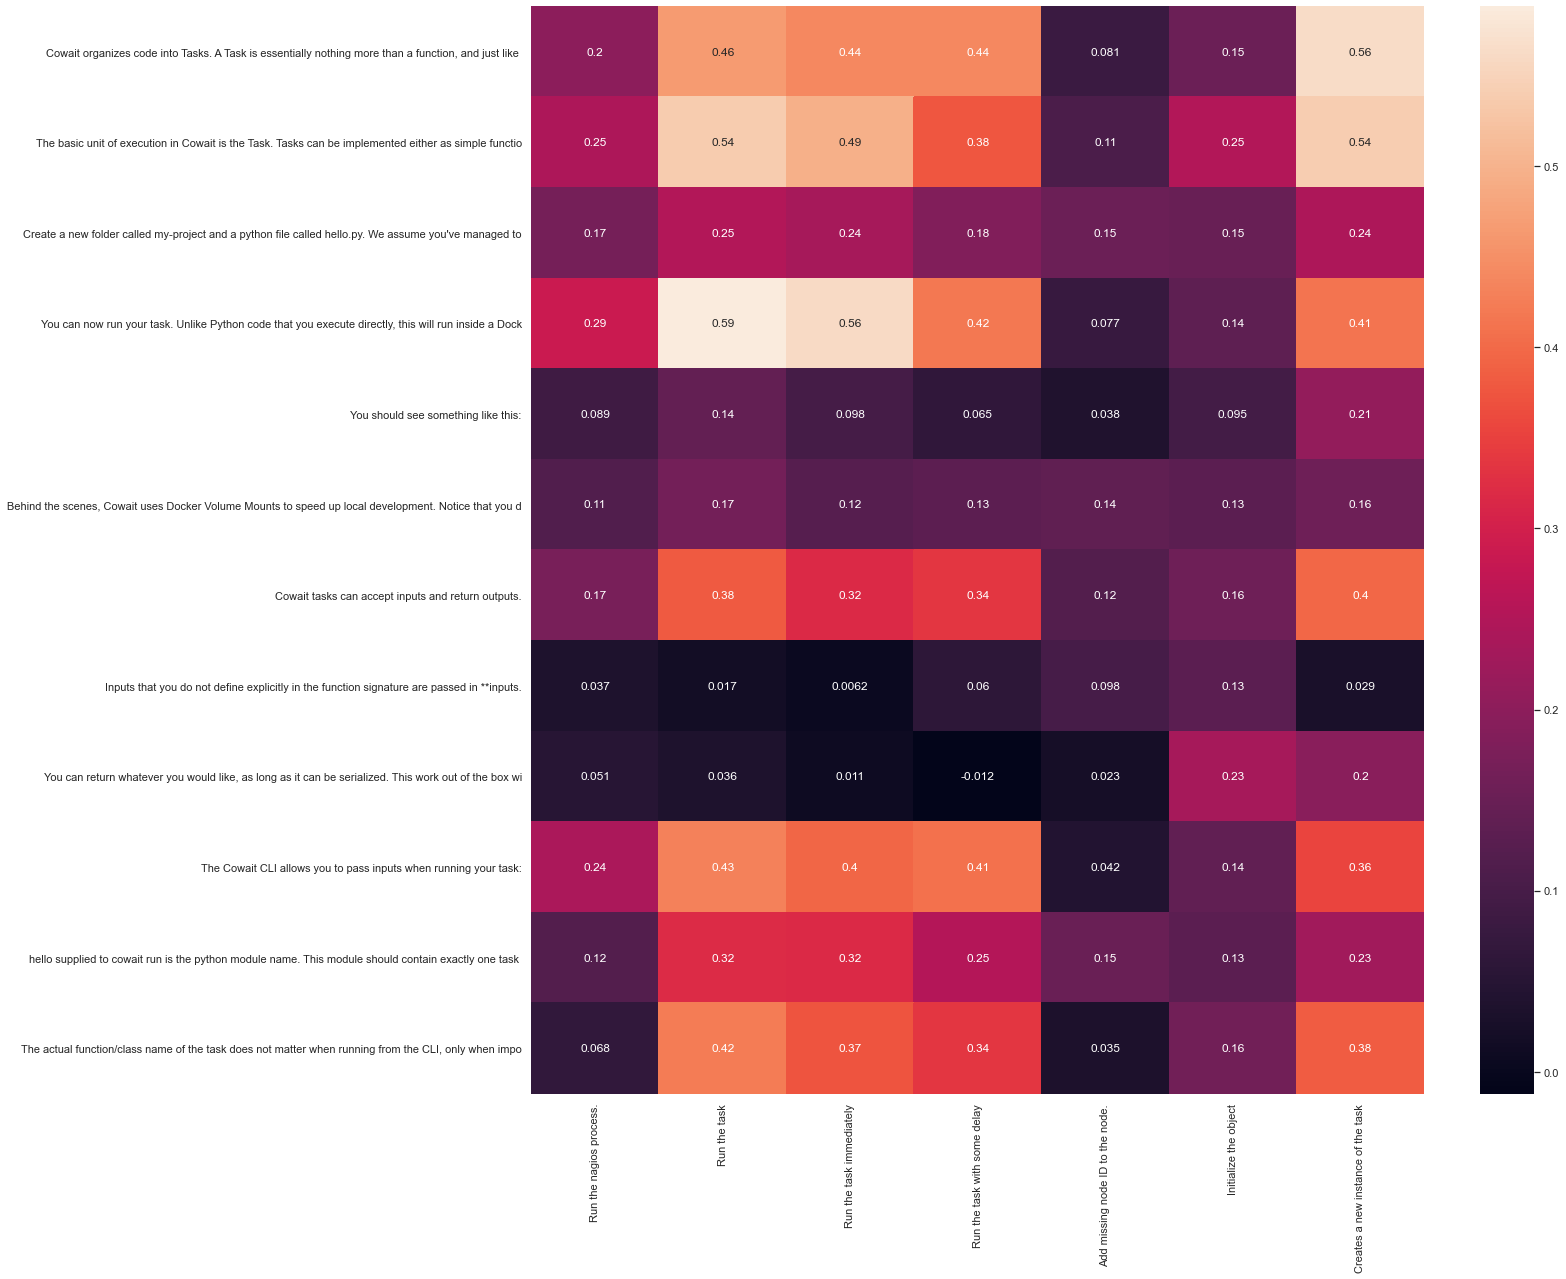

In [16]:
rows = docs_vectors
code_summaries = ["Run the nagios process.", "Run the task", "Run the task immediately", "Run the task with some delay", "Add missing node ID to the node.", "Initialize the object", "Creates a new instance of the task"]
cols = [sbert.encode(x) for x in code_summaries]
sims = cosine_sims(rows, cols)

df = pd.DataFrame(sims, index=[x[:100] for x in docs_statements], columns=code_summaries)
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df, annot=True)